In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/IML")
os.getcwd()

'/content/drive/My Drive/IML'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Functions for Data Preproccessing

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [ ]:
def show_image(image,blackWhite=0):
  if blackWhite==1:
    if len(image.shape)>2:
       image=rgb2gray(image)
    plt.imshow(image,cmap=plt.get_cmap('gray'))
  else:
    plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
def get_random(dir,lim):
   return plt.imread(dir+str(random.randint(1,lim))+".jpg")

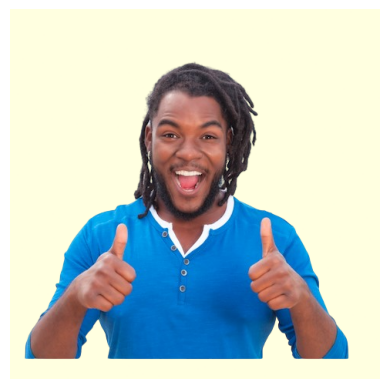

In [ ]:
show_image(get_random("./Datasets/Male images/Happy/Male_happy_",25))

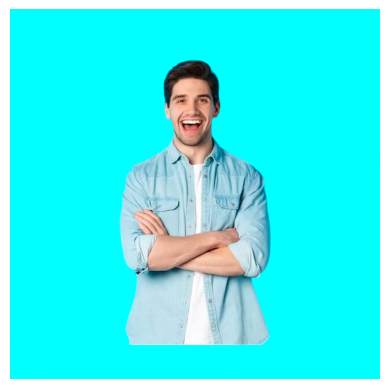

(480, 480, 4)

In [ ]:
im=get_random("./Datasets/Male images/Happy/Male_happy_",25)
# imgray=rgb2gray(im)
show_image(im)
im.shape
# show_image(imgray,1)
# imgray.shape

In [ ]:
def trim_image(image,is_verticle,side=0):  # is_verticle is true for verticle trim, false for horizontal trim. side is 0 for equal trim from both sides, side is 1 for trim only from up or left, side is 2 for trim only from down or right
  if is_verticle==1:

    dif=image.shape[0]-image.shape[1]
    if side==0:
        return image[dif//2:image.shape[0]-(dif//2+(dif%2))]

    elif side==1:
      return image[dif:image.shape[0]+(dif%2)]

    elif side==2:
      return image[:image.shape[0]-dif]


  elif is_verticle==0:

    dif=image.shape[1]-image.shape[0]
    if side==0:
      return image[:,dif//2:image.shape[1]-(dif//2+(dif%2))]

    elif side==1:
      return image[:,dif:image.shape[1]+(dif%2)]

    elif side==2:
      return image[:,:image.shape[1]-dif]

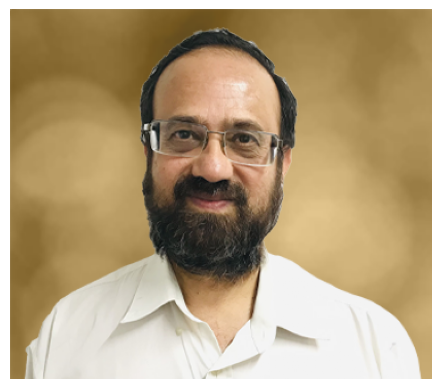

(325, 371, 4)

In [ ]:
img=plt.imread("./Datasets/Sample/SajaySir.png")#[:,:-1]
show_image(img)
img.shape

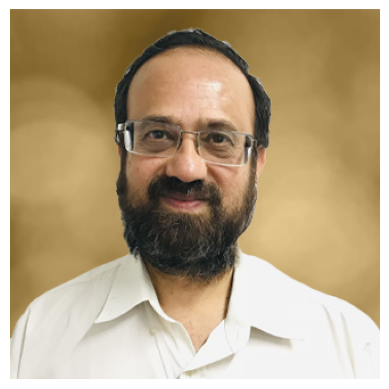

(325, 325, 4)

In [ ]:
img1=trim_image(img,0,0)
show_image(img1)
img1.shape

In [ ]:
def pad_image(image,n,value=0):
  if image.shape[0]!=image.shape[1]:
    return "Not able to Pad"
  if n<=0:
    return image
  r=image.shape[0]+2
  row=np.array([[value for i in range(r)]])
  col=np.array([[value] for i in range(image.shape[0])])

  # print(row,"\n",col)
  # print(np.concatenate((col,image,col),axis=1))
  # print(np.concatenate((row,(np.concatenate((col,image,col),axis=1)),row),axis=0))

  return pad_image(np.concatenate((row,(np.concatenate((col,image,col),axis=1)),row),axis=0),n-1,value)

In [ ]:
a=np.array([[1,2,3],[6,7,8]])
b=np.array([[-1,-2,-3]])
# c=np.array([[11],[12]])
d=np.concatenate((a,b),axis=0)
d

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [-1, -2, -3]])

In [ ]:
pad_image(d,2,2)

array([[ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  1,  2,  3,  2,  2],
       [ 2,  2,  6,  7,  8,  2,  2],
       [ 2,  2, -1, -2, -3,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2,  2]])

In [ ]:
def get_all(dir,ext,lim,to_gray=0):
  l=[]
  for i in range(1,lim+1):
    im=plt.imread(dir+str(i)+"."+ext)
    if to_gray==1:
      im=rgb2gray(im)
    l.append(im)
  return np.array(l)

In [ ]:
X_male_happy=get_all("./Datasets/Male images/Happy/Male_happy_","jpg",25,1)
X_male_happy[:2]

array([[[1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        ...,
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412]],

       [[0.731     , 0.731     , 0.731     , ..., 0.731     ,
         0.731     , 0.731     ],
        [0.731     , 0.731     , 0.731     , ..., 0.731     ,
         0.731     , 0.731     ],
        [0.731     , 0.731     , 0.731     , ..., 0.731     ,
         0.731     , 0.731     ],
        ...,
        [0.731     , 0.731     , 0.731     , ..., 0.731     ,
         0.731     , 0.731     ],
        [0.7

In [ ]:
def check_square_dim(img_list,dim):
    for i in range(len(img_list)):
        if img_list[i].shape[0]!=img_list[i].shape[1] or img_list[i].shape[0]!=dim:
            print("At index: ",i)

In [ ]:
check_square_dim(X_male_happy,480)

In [ ]:
def normalise(gimage):
  l=np.concatenate(gimage)
  mi=min(l)
  ma=max(l)
  # print(mi,ma)
  if len(gimage.shape)==2:
    for i in range(len(gimage[0])):
      for j in range(len(gimage[1])):
        gimage[i][j]=(gimage[i][j]-mi)/(ma-mi)

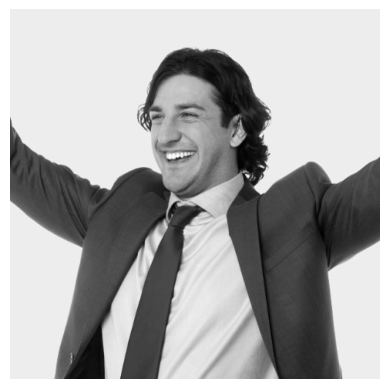

In [ ]:
show_image(X_male_happy[random.randint(1,25)],1)
# X[random.randint(1,25)].shape
# show_image(rgb2gray(img),1)

[[195.371 195.371 195.371 ... 206.269 205.981 205.981]
 [195.371 195.371 195.371 ... 206.269 205.981 205.981]
 [195.382 195.382 195.382 ... 205.981 205.981 207.011]
 ...
 [109.506 108.775 107.756 ... 152.755 153.796 154.538]
 [109.506 108.775 107.756 ... 152.755 153.796 154.826]
 [108.775 108.044 107.756 ... 153.486 154.826 154.826]]


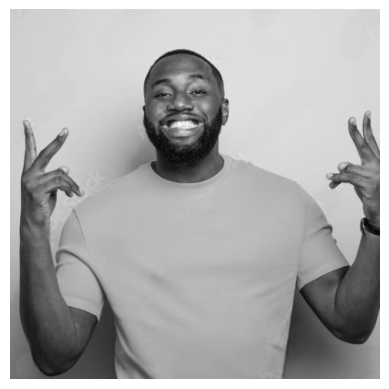

array([[0.79802076, 0.79802076, 0.79802076, ..., 0.84329741, 0.84210089,
        0.84210089],
       [0.79802076, 0.79802076, 0.79802076, ..., 0.84329741, 0.84210089,
        0.84210089],
       [0.79806646, 0.79806646, 0.79806646, ..., 0.84210089, 0.84210089,
        0.84638011],
       ...,
       [0.44128742, 0.43825042, 0.4340169 , ..., 0.62096902, 0.62529394,
        0.62837664],
       [0.44128742, 0.43825042, 0.4340169 , ..., 0.62096902, 0.62529394,
        0.62957316],
       [0.43825042, 0.43521342, 0.4340169 , ..., 0.62400602, 0.62957316,
        0.62957316]])

In [ ]:
rx=X_male_happy[random.randint(1,24)]
print(rx)
show_image(rx,1)
normalise(rx)
rx

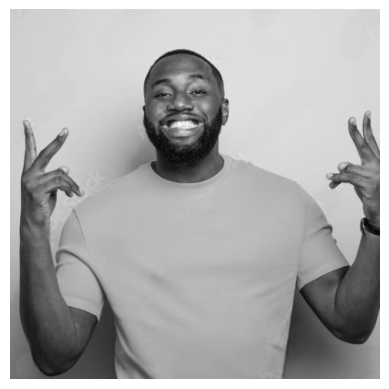

array([[0.79802076, 0.79802076, 0.79802076, ..., 0.84329741, 0.84210089,
        0.84210089],
       [0.79802076, 0.79802076, 0.79802076, ..., 0.84329741, 0.84210089,
        0.84210089],
       [0.79806646, 0.79806646, 0.79806646, ..., 0.84210089, 0.84210089,
        0.84638011],
       ...,
       [0.44128742, 0.43825042, 0.4340169 , ..., 0.62096902, 0.62529394,
        0.62837664],
       [0.44128742, 0.43825042, 0.4340169 , ..., 0.62096902, 0.62529394,
        0.62957316],
       [0.43825042, 0.43521342, 0.4340169 , ..., 0.62400602, 0.62957316,
        0.62957316]])

In [ ]:
show_image(rx,1)
rx

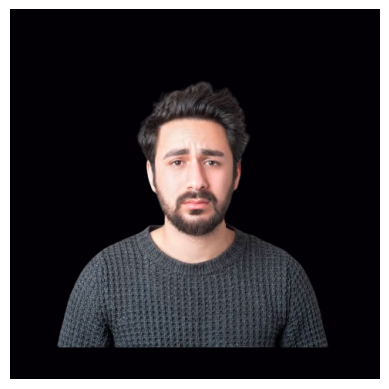

In [ ]:
show_image(get_random("./Datasets/Male images/Sad/Male_sad_",25))

In [ ]:
X_male_sad=get_all("./Datasets/Male images/Sad/Male_sad_","jpg",25,1)
X_male_sad[:2]

array([[[24.997     , 24.997     , 24.997     , ..., 26.78      ,
         26.78      , 26.78      ],
        [24.997     , 24.997     , 24.997     , ..., 26.78      ,
         27.81      , 27.81      ],
        [24.997     , 24.997     , 24.997     , ..., 27.81      ,
         27.81      , 27.81      ],
        ...,
        [18.529     , 18.529     , 18.529     , ..., 67.337     ,
         71.457     , 68.367     ],
        [18.529     , 18.529     , 18.529     , ..., 67.337     ,
         69.397     , 63.217     ],
        [18.529     , 18.529     , 18.529     , ..., 66.307     ,
         68.367     , 60.127     ]],

       [[ 0.99629804,  0.99629804,  0.99629804, ...,  0.99629804,
          0.99629804,  0.99629804],
        [ 0.99629804,  0.99629804,  0.99629804, ...,  0.99629804,
          0.99629804,  0.99629804],
        [ 0.99629804,  0.99629804,  0.99629804, ...,  0.99629804,
          0.99629804,  0.99629804],
        ...,
        [ 0.69552551,  0.69956473,  0.70360394, ...,  

In [ ]:
check_square_dim(X_male_sad,480)

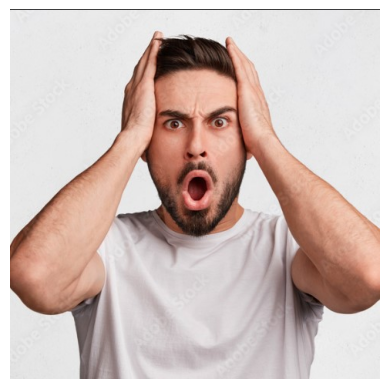

In [ ]:
show_image(get_random("./Datasets/Male images/Surprised/Male_surprised_",25))

In [ ]:
X_male_surprised=get_all("./Datasets/Male images/Surprised/Male_surprised_","jpg",25,1)
X_male_surprised[:2]

array([[[0.99629804, 0.99629804, 0.99629804, ..., 0.99629804,
         0.99629804, 0.99629804],
        [0.99629804, 0.99629804, 0.99629804, ..., 0.99629804,
         0.99629804, 0.99629804],
        [0.99629804, 0.99629804, 0.99629804, ..., 0.99629804,
         0.99629804, 0.99629804],
        ...,
        [0.99629804, 0.99629804, 0.99629804, ..., 0.99629804,
         0.99629804, 0.99629804],
        [0.99629804, 0.99629804, 0.99629804, ..., 0.99629804,
         0.99629804, 0.99629804],
        [0.99629804, 0.99629804, 0.99629804, ..., 0.99629804,
         0.99629804, 0.99629804]],

       [[1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        ...,
        [1.01249412, 1.01249412, 1.01249412, ..., 1.01249412,
         1.01249412, 1.01249412],
        [1.0

In [ ]:
check_square_dim(X_male_surprised,480)

In [ ]:
for i in X_male_happy:
  normalise(i)
for i in X_male_sad:
  normalise(i)
for i in X_male_surprised:
  normalise(i)

In [ ]:
def get_all_better(dir):
  l=os.listdir(dir)
  X=[]
  for i in l:
    try:
      im=plt.imread(dir+"/"+i)
      print(im.shape,i,end=" ")
      im=rgb2gray(im)
      print(im.shape)
      X.append(im)
    except:
       print(i)
  return np.array(X)

In [ ]:
X_female_happy=get_all_better("./Datasets/Female images/Happy")
X_female_happy[:2]

(480, 480, 3) h1.webp (480, 480)
(480, 480, 3) h2.webp (480, 480)
(480, 480, 3) h5.jpg (480, 480)
(480, 480, 3) h6.png (480, 480)
(480, 480, 3) h7.jpg (480, 480)
(480, 480, 3) h8.jpg (480, 480)
(480, 480, 3) h9.jpg (480, 480)
(480, 480, 3) h10.jpg (480, 480)
(480, 480, 3) h11.jpg (480, 480)
(480, 480, 3) h12.jpg (480, 480)
(480, 480, 3) h13.jpg (480, 480)
(480, 480, 3) h14.jpg (480, 480)
(480, 480, 3) h15.jpg (480, 480)
(480, 480, 3) h17.webp (480, 480)
(480, 480, 3) h19.webp (480, 480)
(480, 480, 3) h20.webp (480, 480)
(480, 480, 3) h3.jpg (480, 480)
(480, 480, 3) h4.jpg (480, 480)
(480, 480, 3) h16.jpg (480, 480)
(480, 480, 3) h18.jpg (480, 480)
(480, 480, 3) h21.jpg (480, 480)
(480, 480, 3) h22.jpg (480, 480)
(480, 480, 3) h23.webp (480, 480)
(480, 480, 3) h24.webp (480, 480)
(480, 480, 3) h25.jpg (480, 480)


array([[[193.207, 193.207, 193.207, ..., 177.79 , 177.79 , 177.79 ],
        [193.207, 193.207, 193.207, ..., 177.79 , 177.79 , 177.79 ],
        [194.968, 194.968, 194.968, ..., 177.79 , 177.79 , 177.79 ],
        ...,
        [170.602, 170.602, 170.602, ..., 189.829, 189.829, 189.829],
        [170.602, 170.602, 170.602, ..., 189.829, 189.829, 189.829],
        [170.602, 170.602, 170.602, ..., 189.829, 189.829, 189.829]],

       [[243.335, 243.335, 243.335, ..., 253.336, 253.336, 253.336],
        [243.335, 243.335, 243.335, ..., 253.336, 253.336, 253.336],
        [243.335, 243.335, 243.335, ..., 253.336, 253.336, 253.336],
        ...,
        [158.163, 158.163, 159.337, ..., 169.714, 169.714, 169.714],
        [158.163, 158.163, 159.337, ..., 169.714, 169.714, 169.714],
        [158.163, 158.163, 159.337, ..., 169.714, 169.714, 169.714]]])

In [ ]:
X_female_surprised=get_all_better("./Datasets/Female images/Surprised")
X_female_surprised[:2]

(480, 480, 3) s13.png (480, 480)
(480, 480, 3) s15 (1).jpg (480, 480)
(480, 480, 3) S14 (1).webp (480, 480)
(480, 480, 3) s16.jpg (480, 480)
(480, 480, 3) s17.jpg (480, 480)
(480, 480, 3) s18.jpg (480, 480)
(480, 480, 3) s19.jpg (480, 480)
(480, 480, 3) s20.jpg (480, 480)
(480, 480, 3) s21.jpg (480, 480)
(480, 480, 3) s22.jpg (480, 480)
(480, 480, 3) s23.webp (480, 480)
(480, 480, 3) s24.jpg (480, 480)
(480, 480, 3) s25.jpg (480, 480)
(480, 480, 3) s9 (1).jpg (480, 480)
(480, 480, 3) s1.jpg (480, 480)
(480, 480, 3) s2.webp (480, 480)
(480, 480, 3) s3.jpg (480, 480)
(480, 480, 3) s4.webp (480, 480)
(480, 480, 3) s5.webp (480, 480)
(480, 480, 3) s6.png (480, 480)
(480, 480, 3) s7.png (480, 480)
(480, 480, 3) s8 (1).webp (480, 480)
(480, 480, 4) s10.png (480, 480)
(480, 480, 3) s11.jpg (480, 480)
(480, 480, 3) s12.jpg (480, 480)


array([[[  0.65696081,   0.65982747,   0.66217257, ...,   0.54755297,
           0.51988629,   0.49621569],
        [  0.65696081,   0.66043532,   0.66100002, ...,   0.53139611,
           0.50199216,   0.47428236],
        [  0.65926277,   0.65926277,   0.66447453, ...,   0.50542355,
           0.47315294,   0.44487844],
        ...,
        [  0.30854119,   0.30854119,   0.30506668, ...,   0.26980001,
           0.26980001,   0.26862746],
        [  0.32009413,   0.3125804 ,   0.31375295, ...,   0.26980001,
           0.2663255 ,   0.26862746],
        [  0.32239609,   0.31892158,   0.32183138, ...,   0.26402353,
           0.26172157,   0.26806276]],

       [[223.51      , 223.51      , 223.51      , ..., 220.708     ,
         220.708     , 220.708     ],
        [223.51      , 223.51      , 223.51      , ..., 220.708     ,
         220.708     , 220.708     ],
        [223.51      , 223.51      , 223.51      , ..., 220.708     ,
         220.708     , 220.708     ],
        ...,


In [ ]:
X_female_sad=get_all_better("./Datasets/Female images/Sad")
X_female_sad[:2]

(480, 480, 3) sd1.webp (480, 480)
(480, 480, 3) sd2.webp (480, 480)
(480, 480, 3) sd4.jpg (480, 480)
(480, 480, 3) sd5.jpg (480, 480)
(480, 480, 3) sd7.jpg (480, 480)
(480, 480, 3) sd6.jpg (480, 480)
(480, 480, 3) sd8.jpg (480, 480)
(480, 480, 3) sd9.jpg (480, 480)
(480, 480, 3) sd10.jpg (480, 480)
(480, 480, 3) sd11.jpg (480, 480)
(480, 480, 3) sd12.jpg (480, 480)
(480, 480, 3) sd13.jpg (480, 480)
(480, 480, 3) sd14.jpg (480, 480)
(480, 480, 3) sd16.jpg (480, 480)
(480, 480, 3) sd17.jpg (480, 480)
(480, 480, 3) sd24.jpg (480, 480)
(480, 480, 3) sd3.webp (480, 480)
(480, 480, 3) sd18.jpg (480, 480)
(480, 480, 3) sd19.jpg (480, 480)
(480, 480, 3) sd20.jpg (480, 480)
(480, 480, 3) sd21.webp (480, 480)
(480, 480, 3) sd22.webp (480, 480)
(480, 480, 3) sd23.jpg (480, 480)
(480, 480, 3) sd25.jpg (480, 480)
(480, 480, 3) sd_15 (1).jpg (480, 480)


array([[[ 33.935,  33.935,  34.965, ..., 157.789, 157.789, 157.789],
        [ 31.432,  31.432,  32.905, ..., 157.789, 157.789, 157.789],
        [ 28.785,  28.785,  28.785, ..., 157.789, 157.789, 157.789],
        ...,
        [ 44.014,  44.014,  44.014, ..., 133.667, 133.667, 133.667],
        [ 44.014,  44.014,  44.014, ..., 133.667, 133.667, 133.667],
        [ 44.014,  44.014,  44.014, ..., 133.667, 133.667, 133.667]],

       [[189.683, 189.683, 189.683, ..., 190.713, 191.001, 191.001],
        [189.683, 189.683, 189.683, ..., 190.713, 191.001, 191.001],
        [189.683, 189.683, 189.683, ..., 190.713, 191.001, 191.001],
        ...,
        [191.034, 191.034, 191.034, ..., 192.075, 192.075, 192.075],
        [191.034, 191.034, 191.034, ..., 191.787, 191.787, 191.787],
        [191.034, 191.034, 191.034, ..., 191.787, 191.787, 191.787]]])

In [ ]:
for i in X_female_happy:
  normalise(i)
for i in X_female_sad:
  normalise(i)
for i in X_female_surprised:
  normalise(i)

## Organising Data For Various Classes

In [ ]:
X=np.concatenate((X_male_happy,X_male_surprised,X_male_sad,X_female_happy,X_female_surprised,X_female_sad))
X[:5]

array([[[0.98408063, 0.98408063, 0.98408063, ..., 0.98408063,
         0.98408063, 0.98408063],
        [0.98408063, 0.98408063, 0.98408063, ..., 0.98408063,
         0.98408063, 0.98408063],
        [0.98408063, 0.98408063, 0.98408063, ..., 0.98408063,
         0.98408063, 0.98408063],
        ...,
        [0.98408063, 0.98408063, 0.98408063, ..., 0.98408063,
         0.98408063, 0.98408063],
        [0.98408063, 0.98408063, 0.98408063, ..., 0.98408063,
         0.98408063, 0.98408063],
        [0.98408063, 0.98408063, 0.98408063, ..., 0.98408063,
         0.98408063, 0.98408063]],

       [[0.70875066, 0.70875066, 0.70875066, ..., 0.70875066,
         0.70875066, 0.70875066],
        [0.70875066, 0.70875066, 0.70875066, ..., 0.70875066,
         0.70875066, 0.70875066],
        [0.70875066, 0.70875066, 0.70875066, ..., 0.70875066,
         0.70875066, 0.70875066],
        ...,
        [0.70875066, 0.70875066, 0.70875066, ..., 0.70875066,
         0.70875066, 0.70875066],
        [0.7

In [ ]:
labelsEmotions={0:"Happy",1:"Surprised",2:"Sad"}

y=[]
for i in labelsEmotions.keys():
  for j in range(50):
    y.append(i)
y=np.array(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_male_happy=np.array([0 for i in range(25)])
y_male_surprised=np.array([1 for i in range(25)])
y_male_sad=np.array([2 for i in range(25)])
y_female_happy=np.array([0 for i in range(25)])
y_female_surprised=np.array([1 for i in range(25)])
y_female_sad=np.array([2 for i in range(25)])

In [ ]:
from sklearn.model_selection import train_test_split

randoms=41
testsize=0.3

X_train_male_happy,X_test_male_happy,y_train_male_happy,y_test_male_happy=train_test_split(X_male_happy,y_male_happy,test_size=testsize,random_state=randoms)

X_train_male_surprised,X_test_male_surprised,y_train_male_surprised,y_test_male_surprised=train_test_split(X_male_surprised,y_male_surprised,test_size=testsize,random_state=randoms)

X_train_male_sad,X_test_male_sad,y_train_male_sad,y_test_male_sad=train_test_split(X_male_sad,y_male_sad,test_size=testsize,random_state=randoms)

X_train_female_happy,X_test_female_happy,y_train_female_happy,y_test_female_happy=train_test_split(X_female_happy,y_female_happy,test_size=testsize,random_state=randoms)

X_train_female_surprised,X_test_female_surprised,y_train_female_surprised,y_test_female_surprised=train_test_split(X_female_surprised,y_female_surprised,test_size=testsize,random_state=randoms)

X_train_female_sad,X_test_female_sad,y_train_female_sad,y_test_female_sad=train_test_split(X_female_sad,y_female_sad,test_size=testsize,random_state=randoms)


In [ ]:
X_train=np.concatenate((X_train_male_happy,X_train_male_surprised,X_train_male_sad,X_train_female_happy,X_train_female_surprised,X_train_female_sad))
X_test=np.concatenate((X_test_male_happy,X_test_male_surprised,X_test_male_sad,X_test_female_happy,X_test_female_surprised,X_test_female_sad))
y_train=np.concatenate((y_train_male_happy,y_train_male_surprised,y_train_male_sad,y_train_female_happy,y_train_female_surprised,y_train_female_sad))
y_test=np.concatenate((y_test_male_happy,y_test_male_surprised,y_test_male_sad,y_test_female_happy,y_test_female_surprised,y_test_female_sad))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(102, 480, 480)
(48, 480, 480)
(102,)


(48,)

## Building Model for Sentiment Analysis

In [ ]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from tensorflow.keras import datasets, layers, models
from keras.regularizers import l2
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
input_shape=(480, 480, 1)
num_classes = 3
batch_size=10
epoch=15

In [ ]:
cnnEmoTrain = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
cnnEmoTrain.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnnEmoTrain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 478, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 239, 239, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 237, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 118, 118, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 58, 58, 64)        0

In [ ]:
cnnEmoTrain.load_weights("./Implementation/model_Emotions.h5")

In [ ]:
cnnEmoTrain.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)

Epoch 1/15
11/11 [==============================] - 63s 6s/step - loss: 2.3933 - accuracy: 0.3137
Epoch 2/15
11/11 [==============================] - 68s 6s/step - loss: 1.1059 - accuracy: 0.4020
Epoch 3/15
11/11 [==============================] - 62s 6s/step - loss: 1.0603 - accuracy: 0.4118
Epoch 4/15
11/11 [==============================] - 63s 6s/step - loss: 1.0102 - accuracy: 0.4706
Epoch 5/15
11/11 [==============================] - 57s 5s/step - loss: 0.9295 - accuracy: 0.5392
Epoch 6/15
11/11 [==============================] - 62s 6s/step - loss: 0.9075 - accuracy: 0.5294
Epoch 7/15
11/11 [==============================] - 47s 4s/step - loss: 0.6061 - accuracy: 0.7353
Epoch 8/15
11/11 [==============================] - 50s 4s/step - loss: 0.3786 - accuracy: 0.8725
Epoch 9/15
11/11 [==============================] - 48s 4s/step - loss: 0.1349 - accuracy: 0.9510
Epoch 10/15
11/11 [==============================] - 48s 4s/step - loss: 0.1615 - accuracy: 0.9706
Epoch 11/15
11/11 [

In [ ]:
y_pred = cnnEmoTrain.predict(X_test)
y_pred[:5]

2/2 [==============================] - 15s 7s/step


array([[8.7278295e-01, 1.2639032e-01, 8.2665897e-04],
       [9.9996251e-01, 9.6235205e-08, 3.7289898e-05],
       [1.4417968e-03, 9.9855822e-01, 2.2053847e-08],
       [8.2147604e-01, 1.7791124e-01, 6.1262876e-04],
       [8.6311847e-01, 1.3609803e-01, 7.8350148e-04]], dtype=float32)

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2])

In [ ]:
y_predi=[np.argmax(i) for i in y_pred]
y_predi[:5]

[0, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predi,y_test)

array([[11,  5,  3],
       [ 4, 10,  2],
       [ 1,  1, 11]])

In [ ]:
cnnEmoTrain.evaluate(X_test,y_test)

2/2 [==============================] - 8s 2s/step - loss: 1.5900 - accuracy: 0.6667


[1.5900262594223022, 0.6666666865348816]

In [ ]:
# # cnnEmoTrain.save_weights("./Implementation/model_Emotions2.h5")  #Never Run this

In [ ]:
y_pred = cnnEmoTrain.predict(X_train)
y_pred[:2]

4/4 [==============================] - 13s 3s/step


array([[9.7195250e-01, 1.4508549e-02, 1.3538895e-02],
       [9.9127662e-01, 8.1984876e-03, 5.2495638e-04]], dtype=float32)

In [ ]:
y_predi=[np.argmax(i) for i in y_pred]
y_predi[:2]

[0, 0]

In [ ]:
confusion_matrix(y_predi,y_train)

array([[34,  4,  0],
       [ 0, 29,  0],
       [ 0,  1, 34]])

In [ ]:
cnnEmoTrain.evaluate(X_train,y_train)

4/4 [==============================] - 13s 3s/step - loss: 0.3550 - accuracy: 0.9510


[0.3549615740776062, 0.9509803652763367]

## Building Model for Gender Analysis

In [ ]:
X_male=np.concatenate((X_male_happy,X_male_surprised,X_male_sad))
y_male=np.array([1 for i in range(75)])

X_female=np.concatenate((X_female_happy,X_female_surprised,X_female_sad))
y_female=np.array([0 for i in range(75)])

In [ ]:
randoms=41
testsize=0.3


X_male_train , X_male_test, y_male_train, y_male_test = train_test_split(X_male,y_male,test_size=testsize,random_state=randoms)
X_female_train , X_female_test, y_female_train, y_female_test = train_test_split(X_female,y_female,test_size=testsize,random_state=randoms)


In [ ]:
X_train=np.concatenate((X_male_train,X_female_train))
X_test=np.concatenate((X_male_test,X_female_test))

y_train=np.concatenate((y_male_train,y_female_train))
y_test=np.concatenate((y_male_test,y_female_test))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(104, 480, 480)
(46, 480, 480)
(104,)


(46,)

In [ ]:
input_shape=(480, 480, 1)
num_classes = 2
batch_size=10
epoch=15

In [ ]:
cnnGenTrain = models.Sequential([  #cnnGenTrain
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
cnnGenTrain.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnnGenTrain.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 478, 478, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 239, 239, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 237, 237, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 118, 118, 64)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 891136)            0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
cnnGenTrain.load_weights("./Implementation/model_Gender.h5")

In [ ]:
# cnnGenTrain.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)

In [ ]:
y_pred = cnnGenTrain.predict(X_test)
y_predi=[i>=.5 for i in y_pred]
y_predi[:5]

2/2 [==============================] - 5s 2s/step


[array([False]),
 array([False]),
 array([False]),
 array([ True]),
 array([False])]

In [ ]:
confusion_matrix(y_predi,y_test)

array([[21,  9],
       [ 2, 14]])

In [ ]:
cnnGenTrain.evaluate(X_test,y_test)

2/2 [==============================] - 7s 2s/step - loss: 1.3096 - accuracy: 0.7609


[1.3096139430999756, 0.760869562625885]

In [ ]:
y_pred = cnnGenTrain.predict(X_train)
y_predi=[i>.5 for i in y_pred]
y_predi[:5]

4/4 [==============================] - 12s 3s/step


[array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True])]

In [ ]:
confusion_matrix(y_predi,y_train)

array([[48,  0],
       [ 4, 52]])

In [ ]:
cnnGenTrain.evaluate(X_train,y_train)

4/4 [==============================] - 12s 3s/step - loss: 0.1157 - accuracy: 0.9615


[0.11571165919303894, 0.9615384340286255]

In [ ]:
# # cnnGenTrain.save_weights("./Implementation/model_Gender1.h5") #Never Run this

In [ ]:
dirEmo="./Implementation/model_Emotions.h5"
dirGender="./Implementation/model_Gender.h5"

### Evaluating any image

In [ ]:
def show_result(img,cnnGen,cnnEmo):

  if len(img.shape)==3:
    show_image(img)
    img1=rgb2gray(img)
  else:
    show_image(img,1)
    img1=img
  normalise(img1)
  # print(img1)
  pred_g=cnnGen.predict(np.array([img1]))
  pred_e=np.argmax(cnnEmo.predict(np.array([img1])))
  if pred_g>=.5:
     print("Model Predicted it's a Male and he is ",labelsEmotions[pred_e])
  else:
    print("Model Predicted it's a Female and she is ",labelsEmotions[pred_e])

In [ ]:
def show_result_random(dirOrSet,cnnGen,cnnEmo,mode=0): # Mode is 0 for directory and mode is 1 for Set of inputs
  if mode==0:
    l=os.listdir(dirOrSet)
    im=plt.imread(dirOrSet+l[random.randint(1,len(l))])
    show_result(im,cnnGen,cnnEmo)
  else:
    im=dirOrSet[random.randint(0,len(dirOrSet)-1)]
    # print(im)
    show_result(im,cnnGen,cnnEmo)

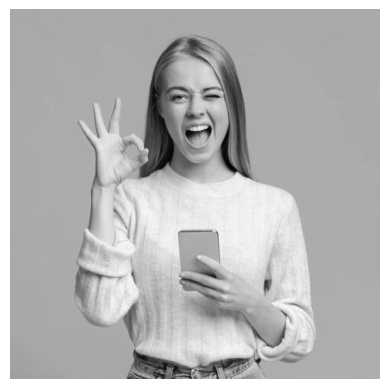

1/1 [==============================] - 0s 131ms/step
Model Predicted it's a Male and he is  Surprised


In [ ]:
# show_result_random("./Datasets/Male images/Happy/",cnnGender,cnnEmoTrain)
show_result_random(X_train,cnnGenTrain,cnnEmoTrain,1)

In [ ]:
def show_image_details(dir):
  img=plt.imread(dir)
  show_image(img)
  print(img.shape)
  return img

In [ ]:
os.chdir("./Datasets/Sample")

In [ ]:
B=["B.jpg","B_new.jpg"]
C=["SajaySir.png","SajaySir_new.png"]
A=["Ankur.png","Ankur_new.png"]
D=["Durga.jpg","Durga_new.jpg"]
Ch=["Chinmay.jpg","Chinmay_new.jpg"]

In [ ]:
imm=Ch

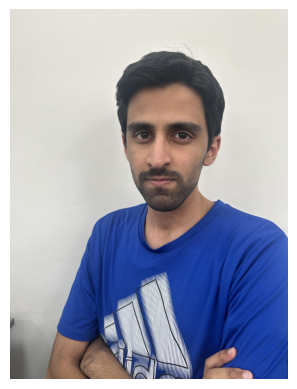

(4032, 3024, 3)


In [ ]:
Img=show_image_details(imm[0])

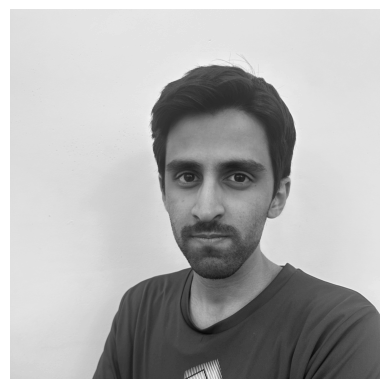

(3024, 3024)

In [ ]:
new_Img=rgb2gray(trim_image(Img,1,2))
# new_Img=new_Img.T
show_image(new_Img,1)
new_Img.shape

In [ ]:
plt.imsave(imm[1],new_Img)

In [ ]:
from PIL import Image

image = Image.open(imm[1])
image

Output hidden; open in https://colab.research.google.com to view.

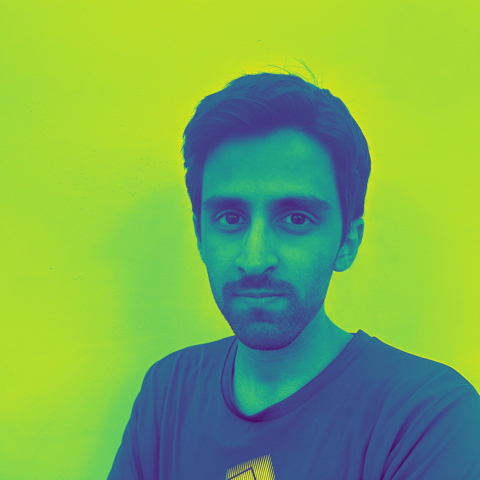

In [ ]:
new_image = image.resize((480, 480))
new_image

In [ ]:
new_image.save(imm[1])

In [ ]:
ima=plt.imread(imm[1])

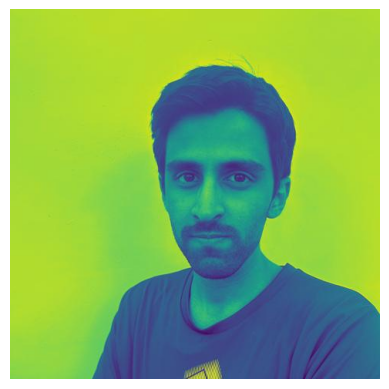

1/1 [==============================] - 0s 145ms/step
Model Predicted it's a Male and he is  Happy


In [ ]:
show_result(ima,cnnGenTrain,cnnEmoTrain)

## Post Training Analysis

### cnnEmoTrain model analysis

In [ ]:
X_train=np.concatenate((X_train_male_happy,X_train_male_surprised,X_train_male_sad,X_train_female_happy,X_train_female_surprised,X_train_female_sad))
X_test=np.concatenate((X_test_male_happy,X_test_male_surprised,X_test_male_sad,X_test_female_happy,X_test_female_surprised,X_test_female_sad))
y_train=np.concatenate((y_train_male_happy,y_train_male_surprised,y_train_male_sad,y_train_female_happy,y_train_female_surprised,y_train_female_sad))
y_test=np.concatenate((y_test_male_happy,y_test_male_surprised,y_test_male_sad,y_test_female_happy,y_test_female_surprised,y_test_female_sad))

In [ ]:
y_pred_Emo = cnnEmoTrain.predict(X_test)

2/2 [==============================] - 8s 2s/step


In [ ]:
print(y_pred_Emo.shape)

(48, 3)


In [ ]:
y_predi_Emo = [np.argmax(i) for i in y_pred_Emo]
for i in y_predi_Emo:
  print(i, end=" ")

0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 2 2 2 0 1 0 1 2 0 0 0 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 

In [ ]:
y_pred_max_Emo=np.array([max(i) for i in y_pred_Emo])
y_pred_max_Emo

array([0.87278295, 0.9999625 , 0.9985582 , 0.82147604, 0.86311847,
       0.5671735 , 0.857958  , 0.7254686 , 0.5309014 , 0.9903896 ,
       0.99294996, 0.5596792 , 0.97846085, 0.54256386, 0.999983  ,
       0.7912057 , 0.9982715 , 0.5945392 , 0.8281588 , 0.69989884,
       0.99999994, 0.67175275, 0.99980116, 0.8682286 , 0.99995154,
       0.89511627, 0.99762577, 0.61275655, 0.95873255, 0.999533  ,
       0.9912675 , 0.99121314, 0.99968874, 0.9999892 , 0.99997777,
       0.9953688 , 0.92480326, 0.9998238 , 0.9999853 , 0.9995262 ,
       0.9999997 , 0.99999994, 0.99999994, 0.99999994, 0.9950692 ,
       0.9998236 , 0.5883235 , 0.99999994], dtype=float32)

In [ ]:
for i in y_test:
  print(i, end=" ")

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predi_Emo)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  4  1]
 [ 5 10  1]
 [ 3  2 11]]


In [ ]:
accuracy = accuracy_score(y_test, y_predi_Emo)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_predi_Emo, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_predi_Emo, average='weighted', zero_division=1)
print("Recall:", recall)

f1 = f1_score(y_test, y_predi_Emo, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
Precision: 0.6833670715249663
Recall: 0.6666666666666666
F1 Score: 0.6707307060755335


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.preprocessing import label_binarize
from itertools import cycle


y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
y_predicted_binary = label_binarize(y_predi_Emo, classes=np.unique(y_predi_Emo))

In [ ]:
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_predicted_binary[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])

auc_score

[0.71875, 0.71875, 0.8125]

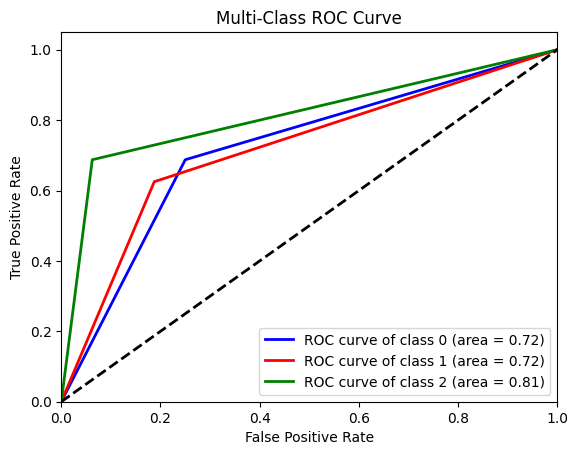

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_predicted_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green']) # Choose colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    cr = classification_report(y_test, y_predi_Emo)
print("\nClassification Report:",)
print (cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        16
           1       0.62      0.62      0.62        16
           2       0.85      0.69      0.76        16

    accuracy                           0.67        48
   macro avg       0.68      0.67      0.67        48
weighted avg       0.68      0.67      0.67        48



In [ ]:
# X_new = X_male_happy + X_female_happy + X_male_surprised + X_female_surprised +X_male_sad + X_female_sad
# y_new = y_male_happy + y_female_happy + y_male_surprised + y_female_surprised +y_male_sad + y_female_sad

X_new = np.concatenate((X_male_happy,X_female_happy,X_male_surprised,X_female_surprised,X_male_sad, X_female_sad))
y_new = np.concatenate((y_male_happy, y_female_happy , y_male_surprised , y_female_surprised ,y_male_sad , y_female_sad))

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(X_new, y_new):
    X_train_new, X_test_new = X_new[train_index], X_new[test_index]
    y_train_new, y_test_new = y_new[train_index], y_new[test_index]


    cnnEmoTrain.fit(X_train_new, y_train_new)

    y_pred_Emo_new = cnnEmoTrain.predict(X_test_new)

    y_predi_Emo_new = [np.argmax(i) for i in y_pred_Emo_new]

    accuracy_new = accuracy_score(y_test_new, y_predi_Emo_new)
    accuracies.append(accuracy_new)

    precision_new = precision_score(y_test_new, y_predi_Emo_new, average='weighted', zero_division = 1)
    precisions.append(precision_new)

    recall_new = recall_score(y_test_new, y_predi_Emo_new, average='weighted')
    recalls.append(recall_new)

    f1_new = f1_score(y_test_new, y_predi_Emo_new, average='weighted')
    f1_scores.append(f1_new)

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)

print("Accuracy:", accuracies)
print("Precision:", precisions)
print("Recall:", recalls)
print("F1 Score:", f1_scores)

print()
print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

1/1 [==============================] - 6s 6s/step
Accuracy: [0.8333333333333334, 0.8, 0.9333333333333333, 1.0, 0.9666666666666667]
Precision: [0.8443732193732194, 0.8412698412698413, 0.9444444444444445, 1.0, 0.9696969696969696]
Recall: [0.8333333333333334, 0.8, 0.9333333333333333, 1.0, 0.9666666666666667]
F1 Score: [0.8298160861089924, 0.7982570806100218, 0.9346092503987241, 1.0, 0.9665831244778613]

Average Accuracy: 0.9066666666666666
Average Precision: 0.9199568949568949
Average Recall: 0.9066666666666666
Average F1 Score: 0.9058531083191198


### cnnGenTrain model analysis

In [ ]:
X_train=np.concatenate((X_male_train,X_female_train))
X_test=np.concatenate((X_male_test,X_female_test))

y_train=np.concatenate((y_male_train,y_female_train))
y_test=np.concatenate((y_male_test,y_female_test))

In [ ]:
X_new=np.concatenate((X_male_happy,X_male_surprised,X_male_sad,X_female_happy,X_female_surprised, X_female_sad))
y_new = np.concatenate((np.array([0 for i in range(75)]),np.array([1 for i in range(75)])))

In [ ]:
y_pred_Gen = cnnGenTrain.predict(X_test)

2/2 [==============================] - 6s 1s/step


In [ ]:
print(y_pred_Gen.shape)

(46, 1)


In [ ]:
y_predi_Gen = [i>=.5 for i in y_pred_Gen]
for i in y_predi_Gen:
  print(i, end=" ")

[False] [False] [False] [ True] [False] [False] [False] [ True] [ True] [ True] [False] [False] [ True] [ True] [ True] [ True] [ True] [ True] [ True] [ True] [ True] [ True] [False] [False] [ True] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [False] [ True] 

In [ ]:
for i in y_test:
  print(i, end=" ")

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predi_Gen)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[21  2]
 [ 9 14]]


In [ ]:
accuracy_gen = accuracy_score(y_test, y_predi_Gen)
print("Accuracy:", accuracy_gen)

precision_gen = precision_score(y_test, y_predi_Gen, average='weighted')
print("Precision:", precision_gen)

recall_gen = recall_score(y_test, y_predi_Gen, average='weighted', zero_division=1)
print("Recall:", recall_gen)

f1_gen = f1_score(y_test, y_predi_Gen, average='weighted')
print("F1 Score:", f1_gen)

Accuracy: 0.7608695652173914
Precision: 0.7874999999999999
Recall: 0.7608695652173914
F1 Score: 0.7552007740686987


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Gen)
roc_auc = auc(fpr, tpr)

Area Under Curve (AUC): 0.7844990548204159



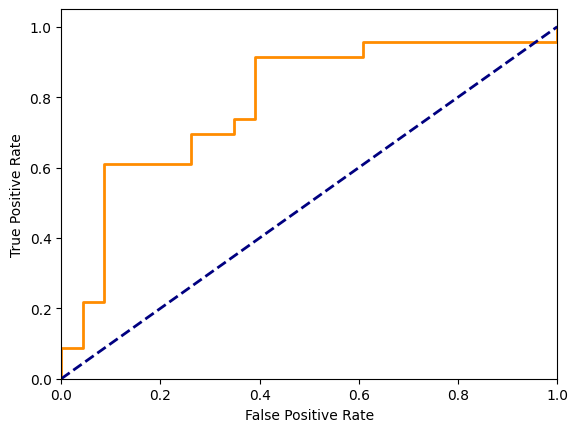

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print("Area Under Curve (AUC):", roc_auc)
print()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    cr = classification_report(y_test, y_predi_Gen)
print("\nClassification Report:",)
print (cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        23
           1       0.88      0.61      0.72        23

    accuracy                           0.76        46
   macro avg       0.79      0.76      0.76        46
weighted avg       0.79      0.76      0.76        46



In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(X_new, y_new):
    X_train_new, X_test_new = X_new[train_index], X_new[test_index]
    y_train_new, y_test_new = y_new[train_index], y_new[test_index]


    cnnEmoTrain.fit(X_train_new, y_train_new)

    y_pred_Gen_new = cnnEmoTrain.predict(X_test_new)

    y_predi_Gen_new = [np.argmax(i) for i in y_pred_Gen_new]

    accuracy_new_Gen = accuracy_score(y_test_new, y_predi_Gen_new)
    accuracies.append(accuracy_new_Gen)

    precision_new_Gen = precision_score(y_test_new, y_predi_Gen_new, average='weighted', zero_division = 1)
    precisions.append(precision_new_Gen)

    recall_new_Gen = recall_score(y_test_new, y_predi_Gen_new, average='weighted')
    recalls.append(recall_new_Gen)

    f1_new_Gen = f1_score(y_test_new, y_predi_Gen_new, average='weighted')
    f1_scores.append(f1_new_Gen)

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)

print("Accuracy:", accuracies)
print("Precision:", precisions)
print("Recall:", recalls)
print("F1 Score:", f1_scores)

print()
print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

1/1 [==============================] - 3s 3s/step
Accuracy: [0.7894736842105263, 0.8421052631578947, 0.7368421052631579, 0.6842105263157895, 0.8421052631578947, 1.0, 0.8333333333333334, 0.9444444444444444]
Precision: [0.8007518796992481, 0.8785425101214576, 0.830827067669173, 0.8105263157894737, 0.8785425101214576, 1.0, 0.875, 0.9500000000000001]
Recall: [0.7894736842105263, 0.8421052631578947, 0.7368421052631579, 0.6842105263157895, 0.8421052631578947, 1.0, 0.8333333333333334, 0.9444444444444444]
F1 Score: [0.7858851674641149, 0.836613272311213, 0.7215865751334858, 0.656015037593985, 0.836613272311213, 1.0, 0.8285714285714286, 0.9442724458204333]

Average Accuracy: 0.8340643274853801
Average Precision: 0.8780237854251012
Average Recall: 0.8340643274853801
Average F1 Score: 0.8261946499007342
